In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from Utils import *
import torch

%matplotlib inline
TRAINP = './data/training.1600000.processed.noemoticon.csv'

In [2]:
df_ = pd.read_csv(TRAINP,delimiter=',', encoding='ISO-8859-1')

In [3]:
df_

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [4]:
display({k:v for k,v in zip(df_.columns, df_.dtypes)})

{'polarity of tweet\xa0': dtype('int64'),
 'id of the tweet': dtype('int64'),
 'date of the tweet': dtype('O'),
 'query': dtype('O'),
 'user': dtype('O'),
 'text of the tweet\xa0': dtype('O')}

In [5]:
target = ['polarity of tweet\xa0']

In [6]:
display(df_[target[0]].unique())

array([0, 4], dtype=int64)

In [7]:
df_[target[0]] = df_[target[0]].replace({4:1})

In [8]:
display(df_[target[0]].unique())

array([0, 1], dtype=int64)

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'center': '. n of unique values 2'}, xlabel='nan rate 0.0'>)

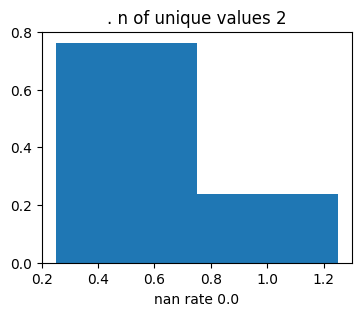

In [9]:
FloatDistr(df_[target[0]])

In [10]:
device_ = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [11]:
device_

device(type='cuda')

In [12]:
torch.cuda.is_available()

True

In [13]:
# torch.cuda.get_device_properties("cuda")

_CudaDeviceProperties(name='NVIDIA GeForce RTX 4070 Ti', major=8, minor=9, total_memory=12281MB, multi_processor_count=60)